epochs: 0.0
[0 0] 0.31634987228520156
[0 1] 0.38455314510086014
[1 0] 0.49960366414001517
[1 1] 0.5470092417007291
[0 0] 0.3976285504258552
[0 1] 0.45821314308761485
[1 0] 0.5931639105741229
[1 1] 0.6295998489950659
[0 0] 0.4829108612940431
[0 1] 0.5682742534555036
[1 0] 0.6557308872863831
[1 1] 0.7085623988515519
[0 0] 0.5244382843252992
[0 1] 0.6034802797710745
[1 0] 0.6978968247405479
[1 1] 0.7431605048776352
[0 0] 0.44187618393814293
[0 1] 0.5008320739159167
[1 0] 0.6133542773394662
[1 1] 0.6501017271524965
[0 0] 0.3545932464926247
[0 1] 0.3851520247735474
[1 0] 0.5144258284823433
[1 1] 0.5329058292578089
[0 0] 0.42970040296327827
[0 1] 0.45543786402015785
[1 0] 0.6015915173972463
[1 1] 0.6139581402813806
[0 0] 0.35688002601702606
[0 1] 0.3869047737905513
[1 0] 0.5449304939172129
[1 1] 0.5596960328762193
[0 0] 0.46057470343613466
[0 1] 0.5264071854872813
[1 0] 0.6244629454954621
[1 1] 0.6659061099638619
[0 0] 0.526132338468269
[0 1] 0.6085832981242786
[1 0] 0.6733930820416418
[1 1]

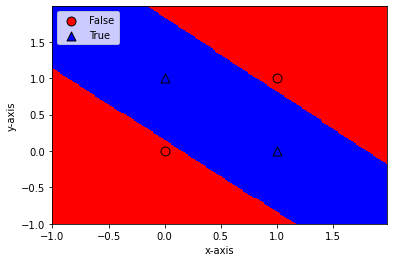

In [4]:
import matplotlib.pyplot as plt
import numpy
from matplotlib.colors import ListedColormap

#definimos la tangente y la derivada de ella
def tanh(x): return (1.0 - numpy.exp(-2*x))/(1.0 + numpy.exp(-2*x))
def tanh_derivative(x):
    return (1 + tanh(x))*(1 - tanh(x))

#definimos la clase 
class NeuralNetwork:
    #inicializa la neurona 
    def __init__(self, net_arch):
         self.activation_func = tanh
         self.activation_derivative = tanh_derivative
         self.layers = len(net_arch)
         self.steps_per_epoch = 1000
         self.net_arch = net_arch
         # initialize the weights with random values in the range (-1,1)
         self.weights = []
         for layer in range(len(net_arch) - 1):
            w = 2 * numpy.random.rand(net_arch[layer] + 1,
            net_arch[layer + 1]) - 1
            self.weights.append(w)

    def fit(self, data, labels, learning_rate=0.1, epochs=10):
        """
        :param data: data is the set of all possible pairs of booleans
                     True or False indicated by the integers 1 or 0
        :param labels: array of 0/1 for each datum
        """
        # Add bias units to the input layer
        ones = numpy.ones((1, data.shape[0]))
        Z = numpy.concatenate((ones.T, data), axis=1)
        training = epochs * self.steps_per_epoch
        for k in range(training):
            if k % self.steps_per_epoch == 0:
                # print ('epochs:', k/self.steps_per_epoch)
                print('epochs: {}'.format(k / self.steps_per_epoch))
            for s in data:
                print(s, nn.predict(s))  # Cambiado nn.predict(s) a self.predict(s)
            sample = numpy.random.randint(data.shape[0])
            y = [Z[sample]]
 
            for i in range(len(self.weights)-1):
                activation = numpy.dot(y[i], self.weights[i])
                activation_f = self.activation_func(activation)
                # add the bias for the next layer
                activation_f = numpy.concatenate((numpy.ones(1), numpy.array(activation_f)))
                y.append(activation_f)
            # last layer
            activation = numpy.dot(y[-1], self.weights[-1])
            activation_f = self.activation_func(activation)
            y.append(activation_f)
            # error for the output layer
            error = labels[sample] - y[-1]
            delta_vec = [error * self.activation_derivative(y[-1])]
            # we need to begin from the back from the next to lastlayer
            for i in range(self.layers - 2, 0, -1):
                 error = delta_vec[-1].dot(self.weights[i][1:].T)
                 error = error * self.activation_derivative(y[i][1:])
                 delta_vec.append(error)
             # reverse
             # [level3(output)→level2(hidden)] ⇒ [level2(hidden)→level3(output)]
            delta_vec.reverse()
            # backpropagation
            # 1. Multiply its output delta and input activation
            # to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight
            for i in range(len(self.weights)):
                 layer = y[i].reshape(1, nn.net_arch[i] + 1)
                 delta = delta_vec[i].reshape(1, nn.net_arch[i + 1])
                 self.weights[i] += learning_rate * layer.T.dot(delta)

    def predict(self, x):
        val = numpy.concatenate((numpy.ones(1).T, numpy.array(x)))
        for i in range(0, len(self.weights)):
            val = self.activation_func(numpy.dot(val, self.weights[i]))
            val = numpy.concatenate((numpy.ones(1).T, numpy.array(val)))
        return val[1]
    
    def plot_decision_regions(self, X, y, points=200):
        markers = ('o', '^')
        colors = ('red', 'blue')
        cmap = ListedColormap(colors)
 
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 
        resolution = max(x1_max - x1_min, x2_max - x2_min) / float(points)
 
        xx1, xx2 = numpy.meshgrid(numpy.arange(x1_min, x1_max, resolution), numpy.arange(x2_min, x2_max, resolution))
 
        input_data = numpy.array([xx1.ravel(), xx2.ravel()]).T
        Z = numpy.empty(0)
 
        for i in range(input_data.shape[0]):
            val = self.predict(numpy.array(input_data[i]))
            if val < 0.5:
                val = 0
            else:
                val = 1
            Z = numpy.append(Z, val)
 
        Z = Z.reshape(xx1.shape)
 
        plt.pcolormesh(xx1, xx2, Z, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
 
        # Dibuja todas las muestras
        classes = ["False", "True"]
        for idx, cl in enumerate(numpy.unique(y)):
            plt.scatter(x=X[y == cl, 0],
                        y=X[y == cl, 1],
                        alpha=1.0,
                        c=colors[idx],
                        edgecolors='black',
                        marker=markers[idx],
                        s=80,
                        label=classes[idx])
 
        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
        plt.legend(loc='upper left')
        plt.show()
 
if __name__ == '__main__':
     numpy.random.seed(0)
     # Initialize the NeuralNetwork with 2 input, 2 hidden, and 1 output neurons
     nn = NeuralNetwork([2, 2, 1])
     X = numpy.array([[0, 0],
             [0, 1],
             [1, 0],
             [1, 1]])
     y = numpy.array([0, 1, 1, 0])
     nn.fit(X, y, epochs=10)
     print("Final prediction")
     for s in X:
         print(s, nn.predict(s))
     nn.plot_decision_regions(X, y)